In [1]:
from IPython.display import Image

from PyQt5.QtGui import QColor
from PyQt5.QtWidgets import QApplication

from qgis.core import QgsApplication, QgsVectorLayer, QgsProject, QgsSymbol, \
    QgsRendererRange, QgsGraduatedSymbolRenderer, \
    QgsArrowSymbolLayer, QgsLineSymbol, QgsSingleSymbolRenderer, \
    QgsSymbolLayer, QgsProperty
from qgis.gui import QgsMapCanvas

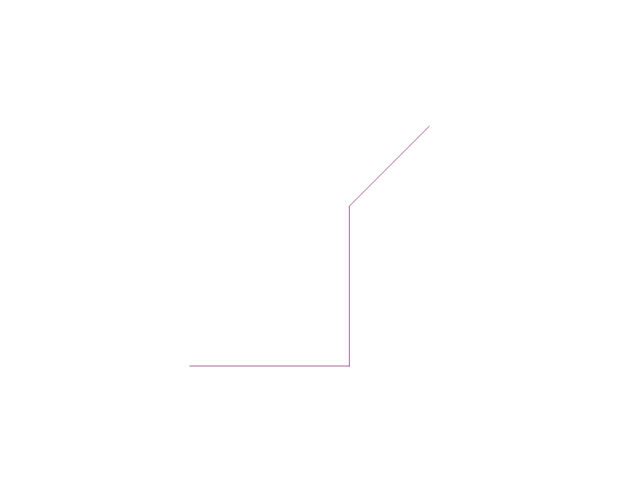

In [2]:
app = QApplication([])
qgs = QgsApplication([], False)
canvas = QgsMapCanvas()
project = QgsProject.instance()

vlayer = QgsVectorLayer("./data/traj.geojson", "My trajectory")
if not vlayer.isValid():
    print("Layer failed to load!")

def saveImage(path, show=True): 
    canvas.saveAsImage(path)
    if show: return Image(path)

project.addMapLayer(vlayer)
canvas.setExtent(vlayer.extent())
canvas.setLayers([vlayer])
canvas.show()
app.exec_()

saveImage("my-traj.png")


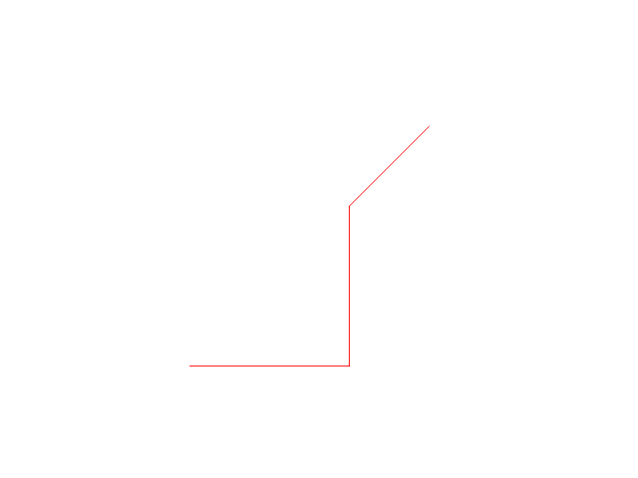

In [3]:
vlayer.renderer().symbol().setColor(QColor("red"))

vlayer.triggerRepaint()
canvas.show()
app.exec_()
saveImage("my-traj.png")

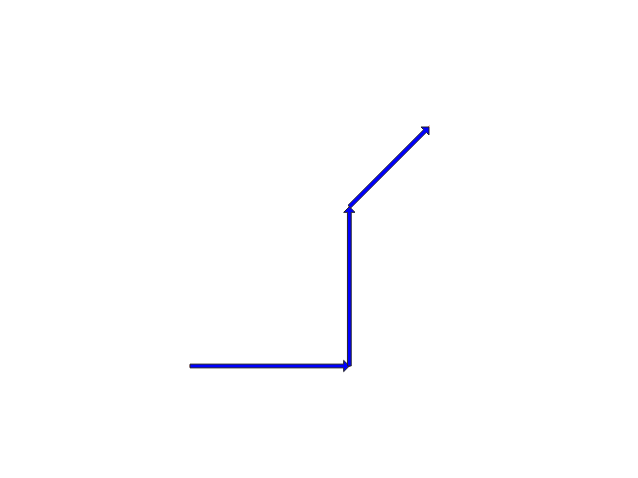

In [4]:
vlayer.renderer().symbol().appendSymbolLayer(QgsArrowSymbolLayer())

vlayer.triggerRepaint()
canvas.show()
app.exec_()
saveImage("my-traj.png")

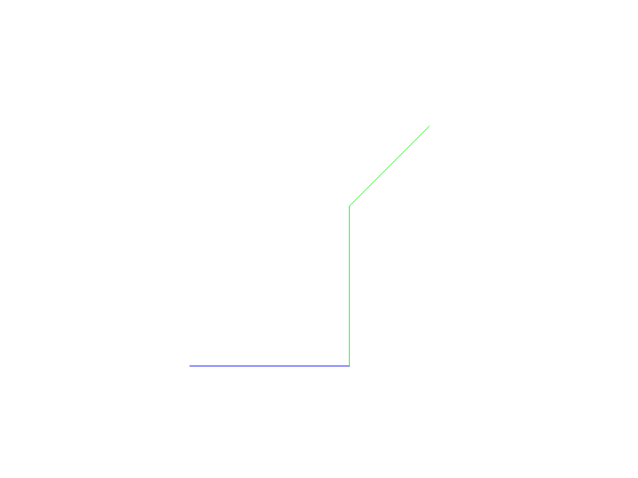

In [5]:
geom_type = vlayer.geometryType()
myRangeList = []

symbol = QgsSymbol.defaultSymbol(geom_type)
symbol.setColor(QColor("#3333ff"))
myRange = QgsRendererRange(0, 1, symbol, 'Group 1')
myRangeList.append(myRange)

symbol = QgsSymbol.defaultSymbol(geom_type)
symbol.setColor(QColor("#33ff33"))
myRange = QgsRendererRange(1, 3, symbol, 'Group 2')
myRangeList.append(myRange)

myRenderer = QgsGraduatedSymbolRenderer('speed', myRangeList)
vlayer.setRenderer(myRenderer)

vlayer.triggerRepaint()
canvas.show()
app.exec_()
saveImage("my-traj.png")

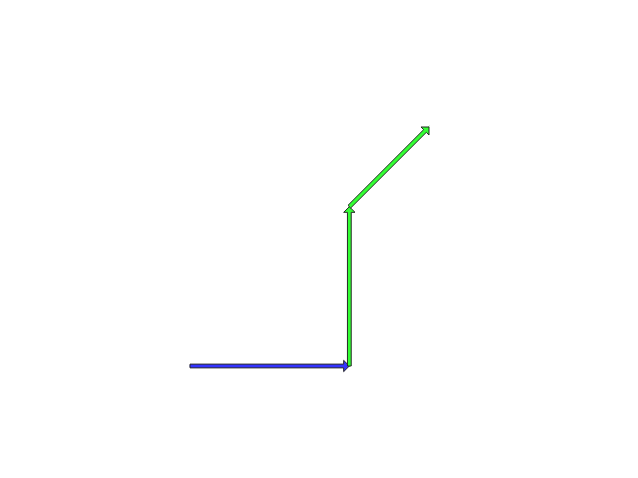

In [7]:
geom_type = vlayer.geometryType()
myRangeList = []

symbol = QgsSymbol.defaultSymbol(geom_type)
symbol.appendSymbolLayer(QgsArrowSymbolLayer())
symbol.setColor(QColor("#3333ff"))
myRange = QgsRendererRange(0, 1, symbol, 'Group 1')
myRangeList.append(myRange)

symbol = QgsSymbol.defaultSymbol(geom_type)
symbol.appendSymbolLayer(QgsArrowSymbolLayer())
symbol.setColor(QColor("#33ff33"))
myRange = QgsRendererRange(1, 3, symbol, 'Group 2')
myRangeList.append(myRange)

myRenderer = QgsGraduatedSymbolRenderer('speed', myRangeList)
vlayer.setRenderer(myRenderer)

vlayer.triggerRepaint()
canvas.show()
app.exec_()
saveImage("my-traj.png")

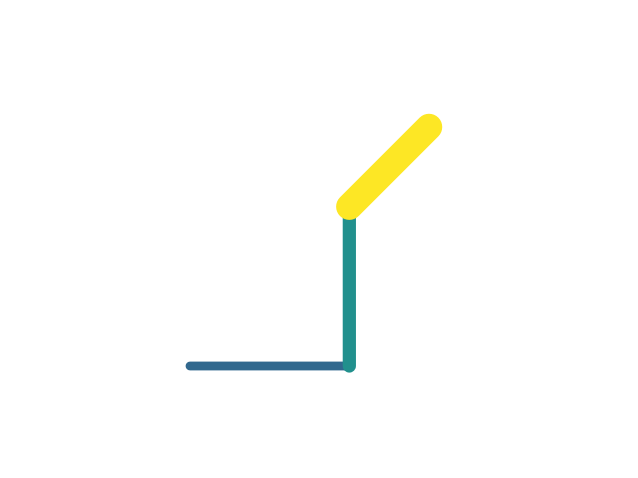

In [8]:
renderer = QgsSingleSymbolRenderer(QgsSymbol.defaultSymbol(geom_type))

exp_width = 'scale_linear("speed", 0, 3, 0, 7)'
exp_color = "coalesce(ramp_color('Viridis',scale_linear(\"speed\", 0, 3, 0, 1)), '#000000')"

# https://qgis.org/pyqgis/3.0/core/Symbol/QgsSymbolLayer.html?highlight=property#qgis.core.QgsSymbolLayer.PropertySize
renderer.symbol().symbolLayer(0).setDataDefinedProperty(
    QgsSymbolLayer.PropertyStrokeWidth, QgsProperty.fromExpression(exp_width))
renderer.symbol().symbolLayer(0).setDataDefinedProperty(
    QgsSymbolLayer.PropertyStrokeColor, QgsProperty.fromExpression(exp_color))
renderer.symbol().symbolLayer(0).setDataDefinedProperty(
    QgsSymbolLayer.PropertyCapStyle, QgsProperty.fromExpression("'round'"))

vlayer.setRenderer(renderer)

vlayer.triggerRepaint()
canvas.show()
app.exec_()
saveImage("my-traj.png")